In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('data_season.csv')
print(data.head())
print(data.info())


   Year   Location   Area  Rainfall  Temperature Soil type Irrigation  \
0  2004  Mangalore   1279    2903.1         27.0  Alluvial       Drip   
1  2004  Mangalore  13283    2903.1         27.0  Alluvial       Drip   
2  2004  Mangalore  52119    2903.1         27.0  Alluvial       Drip   
3  2004  Mangalore    725    2996.6         27.0  Alluvial       Drip   
4  2004  Mangalore  12885    2996.6         27.0  Alluvial       Drip   

     yeilds  Humidity    Crops   price  Season  
0    2570.0      57.0  Coconut  200000  Kharif  
1   27170.0      57.5  Coconut    4847  Kharif  
2  114744.0      57.0  Coconut   51239  Kharif  
3    1402.0      55.0  Coconut  216396  Kharif  
4   23456.0      56.0  Coconut    2644  Kharif  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   

In [2]:
print(data.isnull().sum())

Year            0
Location        0
Area            0
Rainfall        0
Temperature     0
Soil type      58
Irrigation      0
yeilds          0
Humidity        0
Crops           0
price           0
Season          0
dtype: int64


In [3]:
data = data.dropna(subset=['Soil type'])
print(data.isnull().sum())

Year           0
Location       0
Area           0
Rainfall       0
Temperature    0
Soil type      0
Irrigation     0
yeilds         0
Humidity       0
Crops          0
price          0
Season         0
dtype: int64


In [4]:
data_encoded = pd.get_dummies(
    data,
    columns=['Location', 'Soil type', 'Irrigation', 'Crops', 'Season'],
    drop_first=True
)
print(data_encoded.head())


   Year   Area  Rainfall  Temperature    yeilds  Humidity   price  \
0  2004   1279    2903.1         27.0    2570.0      57.0  200000   
1  2004  13283    2903.1         27.0   27170.0      57.5    4847   
2  2004  52119    2903.1         27.0  114744.0      57.0   51239   
3  2004    725    2996.6         27.0    1402.0      55.0  216396   
4  2004  12885    2996.6         27.0   23456.0      56.0    2644   

   Location_Gulbarga  Location_Hassan  Location_Kasaragodu  ...  \
0              False            False                False  ...   
1              False            False                False  ...   
2              False            False                False  ...   
3              False            False                False  ...   
4              False            False                False  ...   

   Crops_Coconut  Crops_Coffee  Crops_Cotton  Crops_Ginger  Crops_Groundnut  \
0           True         False         False         False            False   
1           True        

In [7]:
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 8799907390.973104
R^2 Score: -0.03480588286405473


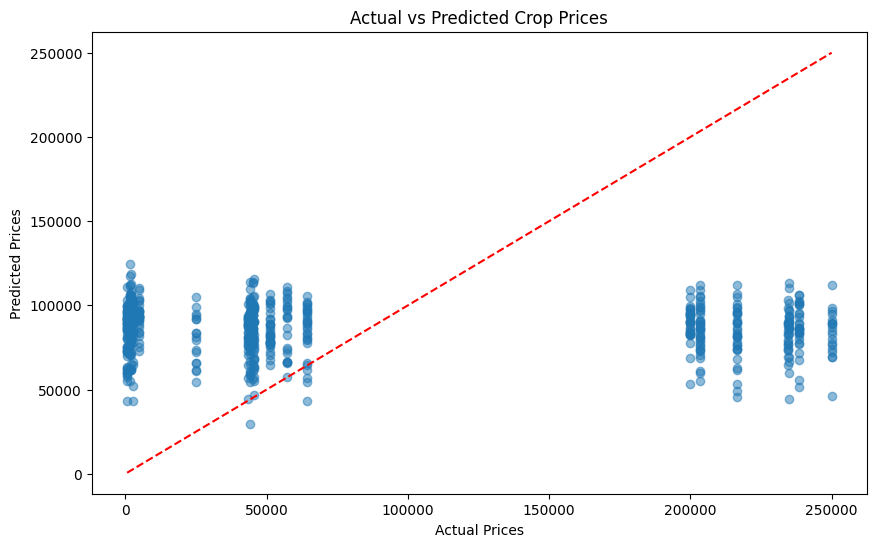

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Crop Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()
